# Alineamiento de secuencias patológicas

Comenzamos realizando la carga de paquetes necesarios:

In [1]:
import Bio
from Bio import SeqIO 
from Bio.Seq import Seq

In [2]:
pip show Biopython

Name: biopython
Version: 1.83
Summary: Freely available tools for computational molecular biology.
Home-page: https://biopython.org/
Author: The Biopython Contributors
Author-email: biopython@biopython.org
License: 
Location: c:\users\gabriel\anaconda3\lib\site-packages
Requires: numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


Para obtener las secuencias utilizaremos la siguiente función:

In [3]:
help(SeqIO.parse)

Help on function parse in module Bio.SeqIO:

parse(handle, format, alphabet=None)
    Turn a sequence file into an iterator returning SeqRecords.
    
    Arguments:
     - handle   - handle to the file, or the filename as a string
       (note older versions of Biopython only took a handle).
     - format   - lower case string describing the file format.
     - alphabet - no longer used, should be None.
    
    Typical usage, opening a file to read in, and looping over the record(s):
    
    >>> from Bio import SeqIO
    >>> filename = "Fasta/sweetpea.nu"
    >>> for record in SeqIO.parse(filename, "fasta"):
    ...    print("ID %s" % record.id)
    ...    print("Sequence length %i" % len(record))
    ID gi|3176602|gb|U78617.1|LOU78617
    Sequence length 309
    
    For lazy-loading file formats such as twobit, for which the file contents
    is read on demand only, ensure that the file remains open while extracting
    sequence data.
    
    If you have a string 'data' containin

Comenzamos visualizando nuestras secuecnias patológicas, para los genes correspondientes:

In [4]:
#para nuestro caso únicamente serán dos tipos de extensión/formato; fasta o genbank
def obtener_tipo_extension(extension):
    diccionario_extensiones = {'fasta':'fasta','fna':'fasta','ffn':'fasta','faa':'fasta','frn':'fasta',
                  'fastq':'fastq','fq':'fastq',
                  'gb':'genbank','gbk':'genbank'}
    return diccionario_extensiones[extension]

def obtener_secuencias(ruta_archivo):
    nombre = ruta_archivo.split('.')
    extension = nombre[-1]
    tipo_ext = obtener_tipo_extension(extension)
    registros=SeqIO.parse(ruta_archivo,tipo_ext)
    lista_secuencias=[]
    for secuencia in registros:
        lista_secuencias.append(secuencia)
    return lista_secuencias

Con ello llamamos a la función para el archivo fasta con las secuencias patológicas de los diferentes genes, y los guardamos en una lista, para facilitar su manipulación:

In [5]:
#llamamos a la función
secs_brca1=obtener_secuencias("Datos\Datos pacientes enfermos\BRCA1 sequences.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En el archivo del gen BRCA1 disponemos de un total de {len(secs_brca1)} secuencias patológicas")

#llamamos a la función
secs_brca2=obtener_secuencias("Datos\Datos pacientes enfermos\BRCA2 sequences.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del gen BRCA2 disponemos de un total de {len(secs_brca2)} secuencias patológicas")

#llamamos a la función
secs_tp53=obtener_secuencias("Datos\Datos pacientes enfermos\TP53 sequences.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del gen TP53 disponemos de un total de {len(secs_tp53)} secuencias patológicas")

#llamamos a la función
secs_pik3ca=obtener_secuencias("Datos\Datos pacientes enfermos\PIK3CA sequences.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del gen PIK3CA disponemos de un total de {len(secs_pik3ca)} secuencias patológicas")

En el archivo del gen BRCA1 disponemos de un total de 1099 secuencias patológicas
En este archivo del gen BRCA2 disponemos de un total de 220 secuencias patológicas
En este archivo del gen TP53 disponemos de un total de 953 secuencias patológicas
En este archivo del gen PIK3CA disponemos de un total de 57 secuencias patológicas


# Filtrado de las secuencias

Comenzamos filtrando por aquellas secuencias correspondientes a exones de los genes de interés:

In [6]:
num_exones_brca1=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_brca1))
print(f'Para el filtrado del gen BRCA1 contamos con un total de {len(num_exones_brca1)} secuencias exónicas')

num_exones_brca2=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_brca2))
print(f'Para el filtrado del gen BRCA2 contamos con un total de {len(num_exones_brca2)} secuencias exónicas')

num_exones_tp53=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_tp53))
print(f'Para el filtrado del gen TP53 contamos con un total de {len(num_exones_tp53)} secuencias exónicas')

num_exones_pik3ca=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_pik3ca))
print(f'Para el filtrado del gen PIK3CA contamos con un total de {len(num_exones_pik3ca)} secuencias exónicas')

Para el filtrado del gen BRCA1 contamos con un total de 394 secuencias exónicas
Para el filtrado del gen BRCA2 contamos con un total de 122 secuencias exónicas
Para el filtrado del gen TP53 contamos con un total de 20 secuencias exónicas
Para el filtrado del gen PIK3CA contamos con un total de 4 secuencias exónicas


In [7]:
def exones(num_exones_gen):
    num_exones=[]
    for exon in num_exones_gen:
        indice_num_exon = exon.description.split(" ").index("exon")+1
        num_exones.append(["exon "+exon.description.split(" ")[indice_num_exon],exon.seq])
    return num_exones

exones_brca1=exones(num_exones_brca1)
exones_brca2=exones(num_exones_brca2)
exones_tp53=exones(num_exones_tp53)
exones_pik3ca=exones(num_exones_pik3ca)

In [8]:
print(exones_brca1)

[['exon 20', Seq('AAGATCTTCTGATCCAGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGAAG...TTG')], ['exon 20', Seq('AAGATCTTCTGAATCCATGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGA...GGC')], ['exon 20', Seq('AAGATCTTCTGAATCCATGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGA...AGT')], ['exon 20', Seq('GTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGAAGTAGCAGCAGAAATCAT...AGC')], ['exon 20', Seq('TTCTGGACATTGGACTGCTTGTCCCTGGGAAGTAGCAGCAGAAATCATCAGGTG...GTT')], ['exon 11', Seq('TTTTTTGTTATTTAAGGTGAAGCAGCATCTGGGTGTGAGAGTGAAACAAGCGTC...ACA')], ['exon 11', Seq('TCTGTTTTTGTTATTTAAGGTGAAGCAGCATCTGGGTGTGAGAGTGAAACAAGC...ACA')], ['exon 15', Seq('GTCATCCCCTTCTAAATGCCCATCATTAGATGATAGGTGGTACATGCACAGTTG...TAG')], ['exon 11', Seq('GGTGAAGCAGCATCTGGGTGTGAGAGTGAAACAAGCGTCTCTGAAGACTGCTCA...TGG')], ['exon 11', Seq('AACCTCTGTTTTTGTTATTTAAGGTGAAGCAGCATCTGGGTGTGAGAGTGAAAC...CGC')], ['exon 20', Seq('AGATCTTCTGAATCCATGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGAA...AGC')], ['exon 20', Seq('AGATCTTCTGAATCCATGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGAA...GAG')], ['exon 11', Seq

In [9]:
def crear_dic(exones_gen):

    dict_exones={}
    
    for exon in exones_gen:
        
        if exon[0] not in dict_exones.keys():
            dict_exones[exon[0]]=[]
            
        dict_exones[exon[0]].append(exon[1])
    
    return dict_exones
    
dict_brca1=crear_dic(exones_brca1)
dict_brca2=crear_dic(exones_brca2)
dict_tp53=crear_dic(exones_tp53)
dict_pik3ca=crear_dic(exones_pik3ca)

In [10]:
#ejemplo
a=[1,2,4,2,7,2,99,53,12,30,18,2828,2]
a.sort()
print(a[::-1][:2])

[2828, 99]


In [11]:
def max_secs(diccionario,corte):
    num_secs=[]
    max_exones=[]
    
    for exon in diccionario.values():
        num_secs.append(len(exon))
    """
    #ejemplo
    a=[1,2,4,2,7,2,99,53,12,30,18,2828,2]
    a.sort()
    print(a[::-1][:2])
    """
    num_secs.sort()
    num_secs_top= num_secs[::-1][:corte]
    
    secuencias_filtradas=list(filter(lambda secuencias: len(secuencias) in num_secs_top ,diccionario.values()))
    
    for secuencias in secuencias_filtradas:
        max_exones.append(list(diccionario.keys())[list(diccionario.values()).index(secuencias)])
                                  
    return max_exones
              
print(f"Los exones con mayor frecuencia de mutacion para el gen BRCA1 son : {max_secs(dict_brca1,2)}")
print(f"Los exones con mayor frecuencia de mutacion para el gen BRCA2 son : {max_secs(dict_brca2,2)}")
print(f"Los exones con mayor frecuencia de mutacion para el gen TP53 son : {max_secs(dict_tp53,2)}")
print(f"Los exones con mayor frecuencia de mutacion para el gen PIK3CA son : {max_secs(dict_pik3ca,2)}")

Los exones con mayor frecuencia de mutacion para el gen BRCA1 son : ['exon 19', 'exon 5']
Los exones con mayor frecuencia de mutacion para el gen BRCA2 son : ['exon 11', 'exon 2']
Los exones con mayor frecuencia de mutacion para el gen TP53 son : ['exon 8', 'exon 5']
Los exones con mayor frecuencia de mutacion para el gen PIK3CA son : ['exon 9', 'exon 20']


Una vez hemos obtenido los exones de los que disponemos mayores secuencias, y por ello mayor diversidad de estas; las filtramos para poder utilizarlas en nuestros alineamientos de secuencias en busca de posibles patrones génicos.

In [12]:
secuencias_brca1= dict(filter(lambda elemento: elemento[0] == max_secs(dict_brca1,2)[0] or elemento[0] == max_secs(dict_brca1,2)[1],map(lambda elemento: (elemento,dict_brca1[elemento]),dict_brca1)))
secuencias_brca2= dict(filter(lambda elemento: elemento[0] == max_secs(dict_brca2,2)[0] or elemento[0] == max_secs(dict_brca2,2)[1],map(lambda elemento: (elemento,dict_brca2[elemento]),dict_brca2)))
secuencias_tp53= dict(filter(lambda elemento: elemento[0] == max_secs(dict_tp53,2)[0] or elemento[0] == max_secs(dict_tp53,2)[1],map(lambda elemento: (elemento,dict_tp53[elemento]),dict_tp53)))
secuencias_pik3ca= dict(filter(lambda elemento: elemento[0] == max_secs(dict_pik3ca,2)[0] or elemento[0] == max_secs(dict_pik3ca,2)[1],map(lambda elemento: (elemento,dict_pik3ca[elemento]),dict_pik3ca)))

In [13]:
secuencias_brca1

{'exon 19': [Seq('AGAAGAGAAGTGGTCATGGGAAGAACCACCAAGGTCCAAAGCGAGCAAGAGAAT...AAG'),
  Seq('GGGGCCGGGCACCTCTCCCTCTCCGTGCGAGAGCACGTTCTTCTGCTGTATGTA...GGC'),
  Seq('GGGGAACTGACTCTCTGTCTGCGTGGGAGAGCACGTTCTTCTGCTGTATGTAAC...AAA'),
  Seq('CGTCCGGTGCTCTGGGTCTGCGCGGTAGACCACGTTCTTCGGCTATATGTAAGC...GCA'),
  Seq('CGGGTACGGACATCTCTGTCTGCGTGGGAGAGCACGTTCTTCTGCTGTATGTAA...AAA'),
  Seq('GGGTACCCTGACTCTCACTCTGCGTGAGAGAGCACGTTCTTCTGCTGTATGTAA...AAA'),
  Seq('ATTTCCGTGCTCTGGATGCTTCCGGTGCACCATGAGCTCTCGCTGAATGTGACG...CAC'),
  Seq('GGGTGCTACTCTCTTCTCCGTGAAAGAGCACGTTCTTCTGCTGTATGTAACCTG...AAA'),
  Seq('GGGGGGGTGACTCTGTATCTCGGTGAGGAGCACGTTCTTCTGCTGTATGTAACC...ACA'),
  Seq('GGGGGGCGGGCCTCTGATCTGCGTGGGAGAGCACGTTCTTCTGCTGTATGTAAC...ACA'),
  Seq('ACTTCCGGGGCCTCTCTTCTCCCTGAGAGAGCACGTTCTTCTGCTGTATGTAAC...GGC'),
  Seq('GGGGGGAGGGGAATCTCTTCTGAGTGCAGAGAGCACGTTCTTCTGCTGTATGTA...TAA'),
  Seq('CGGAACTGAACTCTCTAACTGCAATGAGAGAGCACGTTCTTCTGCTGTATGTAA...AAA'),
  Seq('CGGGTCCTAACTCTCTTCTCCGTGGAAGAGCACGTTCTTCTGCTGTATGTAACC...AA

Para ir finalizando la etapa de filtrado y antes de realizar el alineamiento múltiple de nuestras secuencias patológicas filtradas, debemos comprobar que las longitudes de las secuencias para cada exón de interés correspondientes no presentan grandes variaciones entre sí, y de ser así, aquellas que no cumplieran el criterio, deberían de ser descartadas.

In [14]:
#ejemplo comprobar la longitud de las secuencias
for i in secuencias_brca2["exon 11"]:
    print(len(i))

336
335
331
2145
340
334
383
394
401
593
600
551
341
312
364
361
321
264
312
364
364
353
354
5892
519
238
239
240
241


En el ejemplo anterior observamos que alguna secuencia, dista mucho de ser similar en cuanto a longitud se refiere. Por ello debemos por en práctica la idea comentada.

Para la realización de un correcto alineamiento es imprescindible que las longitudes correspondientes a las secuencias sean lo más similares posibles,por ello hacemos mediante la siguiente función, un filtrado de aquellas secuencias que no cumplan con el umbral establecido al presentar longitudes muy diferentes respecto del resto.

In [15]:
import statistics as stats

def calcular_mediana(dict_secuencias):
    medianas=[]
    for j in list(dict_secuencias):
        long=[]
        for i in dict_secuencias[j]:
            long.append(len(str(i)))
        mediana=stats.median(long)
        medianas.append(mediana)
    return medianas

In [16]:
#función
import statistics as stats

def comprobar_longitudes(dict_secuencias,porcentaje_umbral):
    
    #eliminar valores outliers
    
    dict={}
    medianas=calcular_mediana(dict_secuencias)
    
    for j in list(dict_secuencias):
        
        long_filtradas=[]
        
        for i in dict_secuencias[j]:
            
            if medianas[list(dict_secuencias).index(j)] - medianas[list(dict_secuencias).index(j)] * (porcentaje_umbral/100) <= len(i) <= medianas[list(dict_secuencias).index(j)] + medianas[list(dict_secuencias).index(j)] * (porcentaje_umbral/100):
                
                long_filtradas.append(i)
                
        dict[j]=long_filtradas
        
    return dict
    

In [17]:
#comprobación y filtrado
#estableciendo un porcentaje da varaiabilidad de longitud del 10% respecto a su media
secuencias_brca1_filtradas=comprobar_longitudes(secuencias_brca1,10)

secuencias_brca2_filtradas=comprobar_longitudes(secuencias_brca2,10)

secuencias_tp53_filtradas=comprobar_longitudes(secuencias_tp53,10)

secuencias_pik3ca_filtradas=comprobar_longitudes(secuencias_pik3ca,10)

#print(secuencias_brca1_filtradas)

Por otro lado, a continuación,debo volver a crear un archivo fasta, el cual contenga mis secuencias filtradas de interés, para poder hacer uso de la herramienta especificada. Para ello, haremos un filtro del archivo original con las distintas secuencias almacenadas en los diccionarios finales, añadiéndolas a un nuevo archivo fasta creado mediante la función **SeqIO.write()**; y posteriormente le guardaremos.

Con la idea ya en mente, creamos la función:

In [18]:
def almacenar_sec(diccionario,secuencias_originales,gen,origen):
    
    contador=0
    
    lista_keys=list(diccionario.keys())
    
    #eliminaremos con ella posibles repeticiones de secuencias en nuestro archivo fasta
    lista_ids=[]
    
    num_llave=0
    
    while num_llave < len(lista_keys):
            
        lista_sec=[]
          
        for secuencia in secuencias_originales:
        
            
            for sec_filtrada in diccionario[lista_keys[num_llave]]:
                
                #print(str(sec_filtrada))
                
                if str(secuencia.seq)==str(sec_filtrada) and secuencia.id not in lista_ids:
                    
                    contador=contador+1
                    
                    lista_sec.append(secuencia)
                    lista_ids.append(secuencia.id)
                    
            if origen == "sana":
                SeqIO.write(lista_sec,f"Datos\Secuencias control filtradas\{gen.upper()} {lista_keys[num_llave]}.fasta","fasta")
            if origen == "enferma":
                SeqIO.write(lista_sec,f"Datos\Secuencias patológicas filtradas\{gen.upper()} {lista_keys[num_llave]}.fasta","fasta")
                    
        num_llave=num_llave+1

In [30]:
almacenar_sec(secuencias_brca1_filtradas,secs_brca1,"brca1","enferma")
almacenar_sec(secuencias_brca2_filtradas,secs_brca2,"brca2","enferma")
almacenar_sec(secuencias_tp53_filtradas,secs_tp53,"tp53","enferma")
almacenar_sec(secuencias_pik3ca_filtradas,secs_pik3ca,"pik3ca","enferma")

De esta forma obteermos finalmente las secuencias completamente filtradas:

In [43]:
#secs_brca1

[SeqRecord(seq=Seq('AAGATCTTCTGATCCAGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGAAG...TTG'), id='OM524595.1', name='OM524595.1', description='OM524595.1 Homo sapiens isolate Sh520B1 breast cancer type 1 susceptibility protein (BRCA1) gene, exon 20 and partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('AAGATCTTCTGAATCCATGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGA...GGC'), id='OM524594.1', name='OM524594.1', description='OM524594.1 Homo sapiens isolate Sh420B1 breast cancer type 1 susceptibility protein (BRCA1) gene, exon 20 and partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('AAGATCTTCTGAATCCATGTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGA...AGT'), id='OM524593.1', name='OM524593.1', description='OM524593.1 Homo sapiens isolate Sh320B1 breast cancer type 1 susceptibility protein (BRCA1) gene, exon 20 and partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('GTAGTGTTCTGGACATTGGACTGCTTGTCCCTGGGAAGTAGCAGCAGAAATCAT...AGC'), id='OM524592.1', name='OM524592.1', description='OM524592.1 Homo sapiens isolate Sh220B1 breast cancer typ

# Alineamiento de secuencias

Un alineamiento de secuencias en bioinformática es una forma de representar y comparar dos o más secuencias o cadenas de ADN, ARN, o estructuras primarias proteicas para resaltar sus zonas de similitud, que podrían indicar relaciones funcionales o evolutivas entre los genes o proteínas consultados.

### Clases de alineamiento.

Exiten dos tipos:

- **Alineamiento global**. Se comparan las secuencias enteras, pudiendo introducirse huecos que igualen longitudes de secuencias.
       **(Busca maximizar la puntuación del alinemiento para la secuencia completa)**
    - Coste computacional elevado.
    - Indicado para secuencias con alta similitud y de longitud parecida.

- **Alineamiento local**. Permite identificar secuencias con cierto grado de similitud. Se alinean las partes más parecidas.
      **(Busca maximizar la puntuación del alinemiento para regiones concretas)**
    - Util para busquedas en bases de datos de gran tamaño.
    - En realidad es un alineamiento global de secuencias cortas.


En nuestro caso realizaremos en primer lugar un alineamiento global, esto en pro de obtener las diferencias entre las distintas variantes. Posteriormente pasaremos a un alineamiento local, esta vez para poder determinar dentro de las secuencias aquellas regiones muy similares que puedan ser reconocidas, tras un análisis exahustivo, como biomarcadores patológicos de cáncer de mama.

A su vez, el número de secuencias a confrontar en nuestra situación es múltiple.

Definimos un alineamiento múltiple como una colección de tres o más secuencias de aminoacidos o nucleotidos alineados de forma parcial o completa.

## ¿Para qué puede servir el alineamiento múltiple?

- Informa sobre la función, estructura y evolución de una secuencia.
    - **Identificar patrones comunes de un grupo de secuencias (Para nuestro caso)**
    - Encontrar miembros distantes de una familia de proteinas
        - No es posible obtenerlo mediante el alineamiento por pares.
- Clasificar y generar bases de datos de proteinas una vez secuenciado el genoma completo de un organismo.
    - Predicción de estructuras secundarias y terciarias de proteinas.
- Fundamental para la generación de árboles filogenéticos.
    - Relaciones evolutivas entre secuencias.
- Permite representar familias de secuenccias para generar modelos que faciliten la identificación de miembros potenciales.
    

En el siguiente apartado trataremos con algoritmos de alineamiento múltiple global, es decir que funcionarán mejor cuando las secuencias a comparar tengan un tamaño similar. Asimismo, estos métodos se encuentran diseñados con la premisa de que el numero de *indels* (mutaciones) no sea muy elevado.

**Existen diferentes formas de obtener el alineamiento múltiple**, diferenciando los tipos de algoritmos a emplear:
- Programación dinámica (me sacan la mejor solución, cosa que no siempre se puede hacer en alineamiento múltiple)
- **Algoritmos heurísticos (sacrifican precisión a cambio de rendimiento, nos da una solución que puede que no sea la mejor)**

## Algoritmos heurísticos (no nos aseguran la mejor solución pero nos devuelven una posible solución)

Es lo que se suele utilizar en la realidad.Dado que es posible que nos encontremos con la necesidad de realizar el alineamiento de un gran número de secuencias, no es posible emplear los métodos exactos. 

Es por ello que se emplearán métodos inexactos, es decir que no pueden garantizar obtener la solución óptima, pero que que computacionalmente son aceptables.

Los algoritmos heurísticos se puede clasificar de la siguiente forma:
- **Progresivos**: Se comienza con el alineamiento de dos secuencias y de forma iterativa se van añadiendo el resto de secuencias al alineamiento. (ClustalW)
- **Iterativos**: Se realiza un alineamiento progresivo y se intenta mejorar el alineamiento moviendo, añadiendo o eliminando _gaps_. (Muscle)
- **Híbridos**: Combinan diferentes estrategias empleando información complementaria (información estructural de las proteinas o bases de datos con información de buenos alineamientos locales).

Para la utilización de los algoritmos heuristicos de alineamientos debemos instalar primero de forma local los algoritmos a utilizar, para nuestro caso , ClustalOmega y Muscle.

Una vez instalados, podremos realizar la ejecución de cada uno los programas de alineamiento mediante el módulo Align.Applications (https://biopython.org/docs/latest/api/Bio.Align.Applications.html#module-Bio.Align.Applications):

Applications.ClustalwCommandline

Applications.ClustalOmegaCommandline

Applications.MuscleCommandline

Sin embargo, desde el propio desarrollo de Biopython indican que se aconseja la ejecución de cada uno de los programas mediante subprocesos de Python (https://docs.python.org/3/library/subprocess.html). De esta forma, siempre trabajaremos con la ultima versión instalada y sin problemas de compatibilidad de las funciones de Biopython con el software instalado.

Veamos un par de ejemplos:

Comenzando por la ejecución del algoritmo de clustal para el primer exón de interés de BRCA1, el exón 5.

In [44]:
from Bio import AlignIO

#Ejecutar el algoritmo de Clustal
import subprocess

completed=subprocess.run(["clustalo", "-i",
                          "Datos/Secuencias filtradas/BRCA1 exon 5.fasta", "-o",
                          "Resultados/Resultados alineamiento clustal/clustal algn BRCA1 exon5.afa",
                          "-v","--force",
                          "--outfmt=clu"],capture_output=True)

print('returncode:\n\n\n', completed.stdout.decode('utf-8'))

returncode:


 Using 8 threads



In [45]:
alineamiento_clustal=AlignIO.read("Resultados\Resultados alineamiento clustal\clustal algn BRCA1 exon5.afa","clustal")
print(alineamiento_clustal)

ValueError: >MG932487.1 is not a known CLUSTAL header: CLUSTAL, PROBCONS, MUSCLE, MSAPROBS, Kalign, Biopython

De la misma forma aplicar el algoritmo iterativo de "Muscle":

In [159]:
import subprocess

completed=subprocess.run(["muscle.exe",
                          "-align", "Datos/Secuencias filtradas/BRCA1 exon 19.fasta",
                          "-output", "Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon19.afa"],capture_output=True)

print('returncode:\n\n\n', completed.stdout.decode('utf-8'))


returncode:


 


In [160]:
alineamiento_muscle=AlignIO.read("Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon19.afa","fasta")
print(alineamiento_muscle)

Alignment with 88 rows and 276 columns
GGGGG--A-C-C------TGCC-TC-TC---T-TCT-A-C-T-T...-GA MH027282.1
AGGG---------------GAC-TC-CT-C-T-TCT-C-C-G-T...--A MH027254.1
CGCC-----C-A------CGCC-TC-TC-T-A-TCT-A-G-G-T...TAG MH027239.1
CGGGA----A-C------CGAC-TC-TC---T-TCT-C-C-G-T...AAA MH027238.1
CGGGC--C-C-G------TACC-CC-GA---A-AAT-G-C-A-T...CAC MH027276.1
AGAAA----A-G------TGAC-TC-TC---T-TCT-C-A-G-T...TGA MH027249.1
CGGGG--G-C-T------CCCT-CC-TA-T-G-GAT-G-C-G-T...TGA MH027220.1
AGGGT----C-T------GACC-TC-CC-CAA-TCT-A-A-G-T...-AA MH027223.1
CGTG-----G-C------TGAC-TC-TC---T-TCT-C---G-T...AAG MH027280.1
CGTCC----C-G------GACC-TC-TC-T-A-TCT-G-C-G-T...-AA MH027236.1
CGGGC--C-C-T------TAAC-TC-TC---T-TCT-G-C-G-T...AAA MH027265.1
GGGGG--G-G--------TGAC-TC-TG-T-A-TCT-C-G-G-T...ACA MH027297.1
GGGTT--C-G-G------GACC-TC-TG-T-A-TCT-C-C-G-T...AGG MH027269.1
GGAA-----C-C------GGAC-TC-TC-C-A-TCT-G-C-GGT...-GA MH027216.1
GGGGG--TTC-C------TGAA-TC-TC---T-TCT-G-C-G-T...AGG MH027255.1
GGGC-----G-C------CCAA-TC-TC---

Para una mejor implementación y limpieza, relizamos la creación de un método genérico para la obtención de algoritmos con el nombre de "obtener_alineamiento"

In [47]:
def realizar_alineamiento(algoritmo,ruta_secuencias,ruta_alineamiento):
    if algoritmo == "clustalo":
        
        subprocess.run([algoritmo, "-i",ruta_secuencias, "-o",ruta_alineamiento,"-v","--force","--outfmt=fasta"],capture_output=True)
        
    elif algoritmo== "muscle.exe":
        
        subprocess.run([algoritmo,"-align", ruta_secuencias,"-output", ruta_alineamiento],capture_output=True)
    
    #alineamientos=AlignIO.read(ruta_alineamiento,"fasta")
    
    #return alineamientos

In [48]:
def obtener_alineamiento(ruta_alineamiento):
    
    ruta_segmentada= ruta_alineamiento.split()
    
    if "Resultados alineamiento muscle" in ruta_segmentada:
        
        alineamientos=AlignIO.read(ruta_alineamiento,"fasta")
        
    else:
        
        alineamientos=AlignIO.read(ruta_alineamiento,"clustal")
        
    return alineamientos

Primero creamos los archivos en nuestro equipo donde irán las secuencias.

Ahora realizamos los alineamientos con las secuencias filtradas para el algoritmo "Clustal":

In [181]:
realizar_alineamiento("clustalo","Datos/Secuencias filtradas/BRCA1 exon 5.fasta","Resultados/Resultados alineamiento clustal/clustal algn BRCA1 exon5.afa")
realizar_alineamiento("clustalo","Datos/Secuencias filtradas/BRCA1 exon 19.fasta","Resultados/Resultados alineamiento clustal/clustal algn BRCA1 exon19.afa")

realizar_alineamiento("clustalo","Datos/Secuencias filtradas/BRCA2 exon 2.fasta","Resultados/Resultados alineamiento clustal/clustal algn BRCA2 exon2.afa")
realizar_alineamiento("clustalo","Datos/Secuencias filtradas/BRCA2 exon 11.fasta","Resultados/Resultados alineamiento clustal/clustal algn BRCA2 exon11.afa")

realizar_alineamiento("clustalo","Datos/Secuencias filtradas/TP53 exon 5.fasta","Resultados/Resultados alineamiento clustal/clustal algn TP53 exon5.afa")
realizar_alineamiento("clustalo","Datos/Secuencias filtradas/TP53 exon 8.fasta","Resultados/Resultados alineamiento clustal/clustal algn TP53 exon8.afa")

realizar_alineamiento("clustalo","Datos/Secuencias filtradas/PIK3CA exon 9.fasta","Resultados/Resultados alineamiento clustal/clustal algn PIK3CA exon9.afa")
realizar_alineamiento("clustalo","Datos/Secuencias filtradas/PIK3CA exon 20.fasta","Resultados/Resultados alineamiento clustal/clustal algn PIK3CA exon20.afa")

Y guardamos cada resultado en una variable global.

In [182]:
c_algn_brca1_exon5=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn BRCA1 exon5.afa")
c_algn_brca1_exon19=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn BRCA1 exon19.afa")

c_algn_brca2_exon2=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn BRCA2 exon2.afa")
c_algn_brca2_exon11=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn BRCA2 exon11.afa")
                                        
c_algn_tp53_exon5=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn TP53 exon5.afa")
c_algn_tp53_exon8=obtener_alineamiento("Resultados/Resultados alineamiento clustal//clustal algn TP53 exon8.afa")

c_algn_pik3ca_exon9=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn PIK3CA exon9.afa")
#c_algn_pik3ca_exon20=obtener_alineamiento("Resultados/Resultados alineamiento clustal/clustal algn PIK3CA exon20.afa")

ValueError: >MG932487.1 is not a known CLUSTAL header: CLUSTAL, PROBCONS, MUSCLE, MSAPROBS, Kalign, Biopython

Realizamos los correspondientes alineamientos con el método creado para el algoritmo de "Muscle", guardando cada uno de ellos en variables globales:

In [165]:
realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/BRCA1 exon 5.fasta","Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon5.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/BRCA1 exon 19.fasta","Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon19.afa")

realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/BRCA2 exon 2.fasta","Resultados/Resultados alineamiento muscle/muscle algn BRCA2 exon2.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/BRCA2 exon 11.fasta","Resultados/Resultados alineamiento muscle/muscle algn BRCA2 exon11.afa")

realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/PIK3CA exon 9.fasta","Resultados/Resultados alineamiento muscle/muscle algn PIK3CA exon9.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/PIK3CA exon 20.fasta","Resultados/Resultados alineamiento muscle/muscle algn PIK3CA exon20.afa")

realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/TP53 exon 5.fasta","Resultados/Resultados alineamiento muscle/muscle algn TP53 exon5.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias filtradas/TP53 exon 8.fasta","Resultados/Resultados alineamiento muscle/muscle algn TP53 exon8.afa")

In [166]:
alineamiento_muscle=AlignIO.read("Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon5.afa","fasta")
print(alineamiento_muscle)

Alignment with 98 rows and 421 columns
---------ATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--G MG932399.1
---------------------AAAGGAAGTAAATTAAATT-GTT...--A MG932400.1
-----GAGTATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--- MG932398.1
---------ATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932445.1
-----------------ACAAAAAGGAAGTAAATTAAATT-GTT...--A MG932481.1
----------TTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--G MG932447.1
-----------TCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932483.1
-----------TCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932410.1
---------ATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932407.1
----------------CTACAAAAGGAAGTAAATTAAATT-GTT...--A MG932478.1
--------TATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932417.1
---------ATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--G MG932449.1
-----------TCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932459.1
--------TATTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--C MG932453.1
----------TTCTTTCTACAAAAGGAAGTAAATTAAATT-GTT...--G MG932408.1
---------ATTCTTTCTACAAAAGGAAGTA

In [167]:
m_algn_brca1_exon5=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon5.afa")
m_algn_brca1_exon19=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn BRCA1 exon19.afa")

m_algn_brca2_exon2=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn BRCA2 exon2.afa")
m_algn_brca2_exon11=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn BRCA2 exon11.afa")

m_algn_tp53_exon5=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn TP53 exon5.afa")
m_algn_tp53_exon8=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn TP53 exon8.afa")

m_algn_pik3ca_exon9=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn PIK3CA exon9.afa")
m_algn_pik3ca_exon20=obtener_alineamiento("Resultados/Resultados alineamiento muscle/muscle algn PIK3CA exon20.afa")

ValueError: >MG932399.1 is not a known CLUSTAL header: CLUSTAL, PROBCONS, MUSCLE, MSAPROBS, Kalign, Biopython

# Visualización de alineamiento

In [166]:
pip install logomaker


  Obtaining dependency information for logomaker from https://files.pythonhosted.org/packages/87/6d/9a9976674e77de3eab157e8c50667a7091058fa355fd7665eb1ab4b93c5a/logomaker-0.8-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.8 MB 653.6 kB/s eta 0:00:19
    --------------------------------------- 0.2/11.8 MB 2.3 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.8 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.8 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/11.8 MB 5.2 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.8 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.8 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.8 MB 5.8 MB/s eta 0:00:02
   -------- ------------------------

## Alineamientos clustal

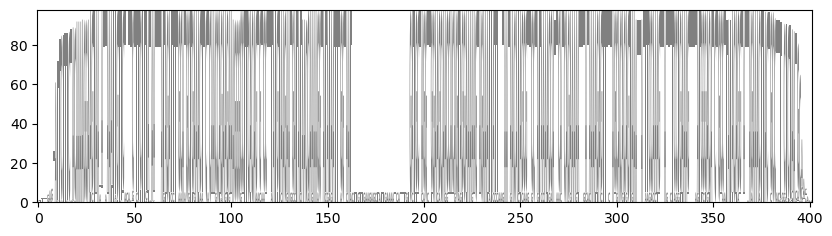

In [47]:
import logomaker
import pandas as pd
import matplotlib.pyplot as plt

secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn BRCA1 exon5.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()


Debido a que el alineamiento multiple presentado es un de gran tamaño, no se puede visualizar correctamente el contenido del gráfico. 
Para poder solventar esta situación existen dos posibilidades:

    -Reducir el número de secuencias mostrado, haciendo una cohorte nueva de las secuencias

    -Ajustando la visualización del gráfico, filtrando por variabilidad o una representación más ajustada

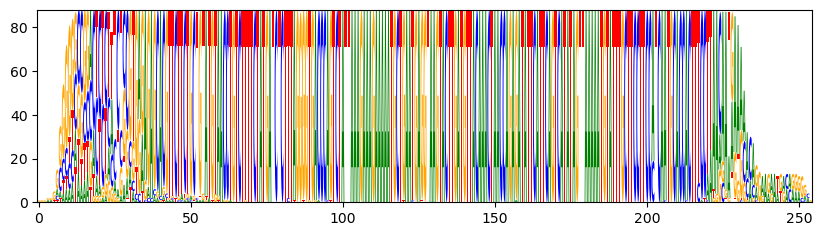

In [43]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn BRCA1 exon19.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

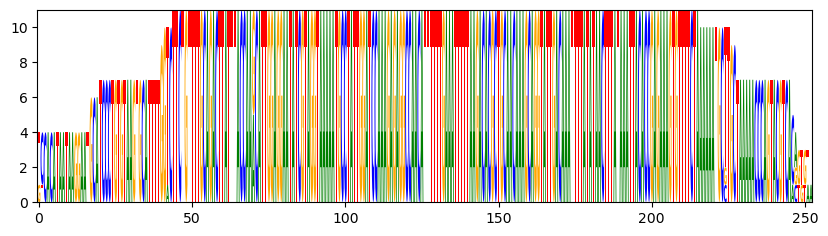

In [44]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn BRCA2 exon2.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

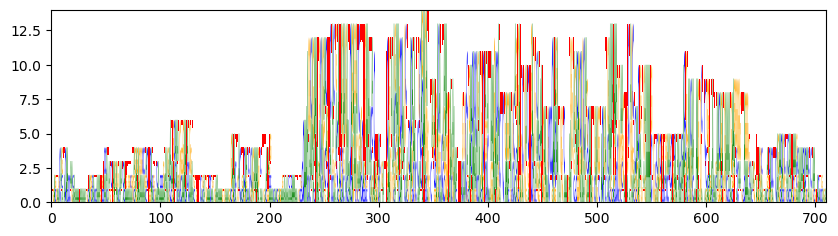

In [42]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn BRCA2 exon11.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()


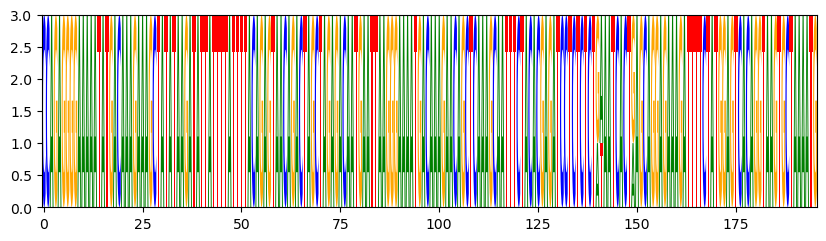

In [53]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn PIK3CA exon9.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

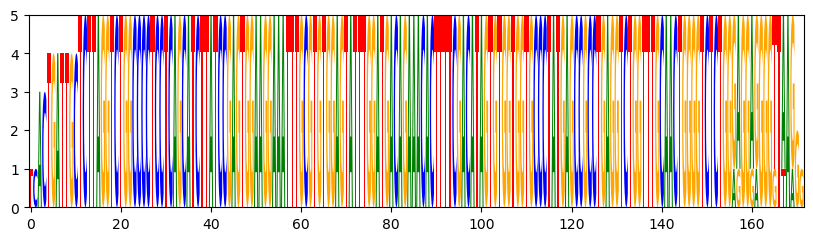

In [45]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn TP53 exon5.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

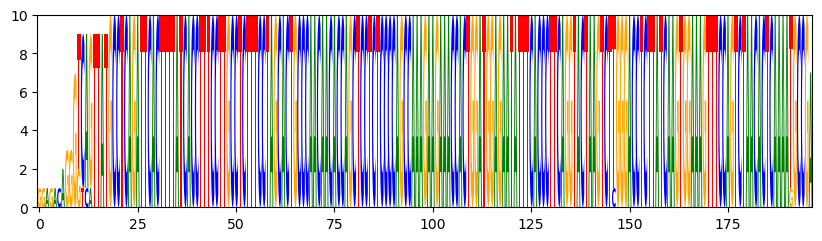

In [55]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias patológicas/Resultados alineamiento clustal/clustal algn TP53 exon8.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

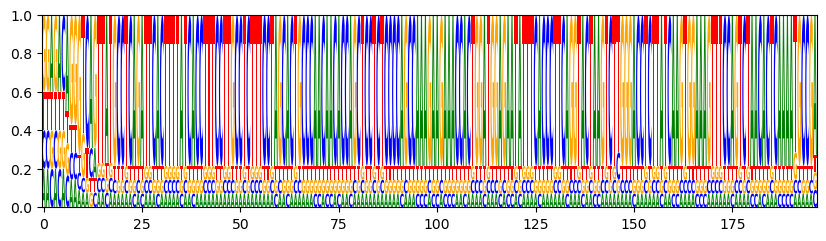

In [50]:
prob_mat = logomaker.transform_matrix(DF_conteos, from_type='counts', to_type='probability')
logo = logomaker.Logo(prob_mat)

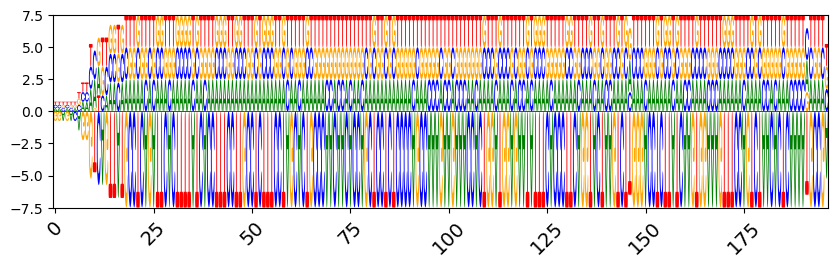

In [61]:
logo = logomaker.Logo(df=-DF_conteos,
              center_values=True,
              font_name = 'Arial Rounded MT Bold')

logo.style_xticks(spacing=25, anchor=100, rotation=45, fmt='%d', fontsize=14)

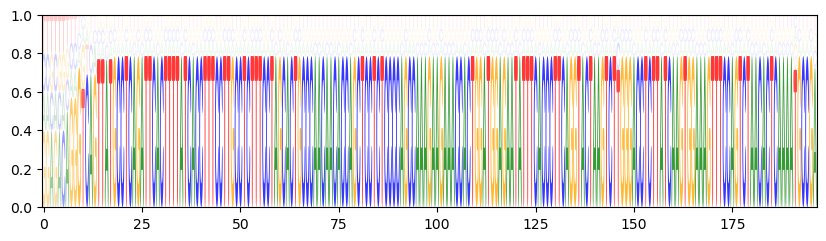

In [60]:
logo = logomaker.Logo(prob_mat, 
               fade_probabilities=True,
               stack_order='small_on_top',
               font_name='Arial Rounded MT Bold')


para utilizar visitar logomaker:https://github.com/jbkinney/logomaker/blob/master/logomaker/tutorials/2_logos_from_alignment.ipynb 

### WGCNA

In [69]:
pip install WGCNApy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement WGCNApy (from versions: none)
ERROR: No matching distribution found for WGCNApy


# Alineamiento de secuencias control

Primeramente se obtienen las secuencias disponibles de los correspondientes archivos de los exones almacenados:

In [34]:
#BRCA1
#llamamos a la función
secs_control_brca1_5=obtener_secuencias("Datos\Datos pacientes sanos\BRCA1 exon 5.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En el archivo del gen BRCA1 disponemos de un total de {len(secs_control_brca1_5)} secuencias sanas")

#BRCA2
#llamamos a la función
secs_control_brca2_11=obtener_secuencias("Datos\Datos pacientes sanos\BRCA2 exon 11.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del exon 11 del gen BRCA2 disponemos de un total de {len(secs_control_brca2_11)} secuencias sanas")

#llamamos a la función
secs_control_brca2_2=obtener_secuencias("Datos\Datos pacientes sanos\BRCA2 exon 2.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del exon 2 del gen BRCA2 disponemos de un total de {len(secs_control_brca2_11)} secuencias sanas")

#TP53
#llamamos a la función
secs_control_tp53_5=obtener_secuencias("Datos\Datos pacientes sanos\TP53 exon 5.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del exon 5 del gen TP53 disponemos de un total de {len(secs_control_tp53_5)} secuencias sanas")

#llamamos a la función
secs_control_tp53_8=obtener_secuencias("Datos\Datos pacientes sanos\TP53 exon 8.fasta")

#calculamos la cancidad de secuencias presentes aquí
print(f"En este archivo del exon 8 del gen TP53 disponemos de un total de {len(secs_control_tp53_8)} secuencias sanas")

En el archivo del gen BRCA1 disponemos de un total de 5 secuencias sanas
En este archivo del exon 11 del gen BRCA2 disponemos de un total de 4 secuencias sanas
En este archivo del exon 2 del gen BRCA2 disponemos de un total de 4 secuencias sanas
En este archivo del exon 5 del gen TP53 disponemos de un total de 67 secuencias sanas
En este archivo del exon 8 del gen TP53 disponemos de un total de 61 secuencias sanas


# Filtrado de las secuencias 

Se simplifican las secuencias cargadas en listas, para un mejor manejo y facilitar de este modo la filtración:

In [35]:
exon_5_control_brca1=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_control_brca1_5))

exon_2_control_brca2=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_control_brca2_2))

exon_11_control_brca2=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_control_brca2_11))

exones_control_brca2=exon_2_control_brca2+exon_11_control_brca2

exon_5_control_tp53=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_control_tp53_5))

exon_8_control_tp53=list(filter(lambda secuencia: "exon" in secuencia.description.split(" "),secs_control_tp53_8))

exones_control_tp53=exon_5_control_tp53+exon_8_control_tp53

In [36]:
lista=exon_2_control_brca2+exon_11_control_brca2
lista

[SeqRecord(seq=Seq('GACTTAACTTCCCTCCCAGCTGTCCCAGATGACGCCATCTGAAATTTCTTGGAA...CCC'), id='X95152.1', name='X95152.1', description='X95152.1 H.sapiens brca2 gene exon 2 (and joined coding region)', dbxrefs=[]),
 SeqRecord(seq=Seq('TACTTATTTAAGTAACAGTAGCATGTCTAACAGCTATTCCTACCATTCTGATGA...CTC'), id='MT901682.1', name='MT901682.1', description='MT901682.1 Homo sapiens truncated BRCA2 DNA repair associated (BRCA2) gene, exon 11 and partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('GGGCTTTTATTCTGCTCATGGCACAAAACTGAATGTTTCTACTGAAGCTCTGCA...TAA'), id='MT901681.1', name='MT901681.1', description='MT901681.1 Homo sapiens truncated BRCA2 DNA repair associated (BRCA2) gene, exon 11 and partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('TAATTCAAACCATAATTTAACACCTAGCCAAAAGGCAGAAATTACAGAACTTTC...AGA'), id='MT901680.1', name='MT901680.1', description='MT901680.1 Homo sapiens truncated BRCA2 DNA repair associated (BRCA2) gene, exon 11 and partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('AGCAACCCAAGTGTCAATTAAAAAAGAT

In [37]:
dic_exon_5_brca1=crear_dic(exones(exon_5_control_brca1))
dic_exones_brca2=crear_dic(exones(exones_control_brca2))
dic_exones_tp53=crear_dic(exones(exones_control_tp53))
dic_exon_5_brca1

{'exon 5': [Seq('TCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGTT...ACC'),
  Seq('CTACTGTTGCTGCATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGT...ACC'),
  Seq('ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGT...TCA'),
  Seq('ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGT...TCA'),
  Seq('ATCTTATTTTTATTTGTTTACATGTCTTTTCTTATTTTAGTGTCCTTAAAAGGT...CCA')]}

Se compruba en último lugar, las longitudes de las secuencias control. Con dicho proceso ya realizado, se almacenarían en unos nuevos archivos junto a las secuencias patológicas ya filtradas

In [40]:
secuencias_control_brca1_filtradas=comprobar_longitudes(dic_exon_5_brca1,10)

secuencias_control_brca2_filtradas=comprobar_longitudes(dic_exones_brca2,10)

secuencias_control_tp53_filtradas=comprobar_longitudes(dic_exones_tp53,10)


Se almacenan las secuencias en archivos .fasta: 

In [42]:
almacenar_sec(secuencias_control_brca1_filtradas,exon_5_control_brca1,"brca1","sana")
almacenar_sec(secuencias_control_brca2_filtradas,exones_control_brca2,"brca2","sana")
almacenar_sec(secuencias_control_tp53_filtradas,exones_control_tp53,"tp53","sana")

# Alineamiento

Como se realizó en su momento con las secuencias patológicas, ahora con las secuencias control:
    
Empezando por el alineamiento clustal correspondiente: 

In [50]:
realizar_alineamiento("clustalo","Datos/Secuencias control filtradas/BRCA1 exon 5.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn BRCA1 exon5.afa")
realizar_alineamiento("clustalo","Datos/Secuencias control filtradas/BRCA2 exon 11.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn BRCA2 exon11.afa")
realizar_alineamiento("clustalo","Datos/Secuencias control filtradas/TP53 exon 5.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn TP53 exon5.afa")
realizar_alineamiento("clustalo","Datos/Secuencias control filtradas/TP53 exon 8.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn TP53 exon8.afa")

A continuación realizando un alineamiento progresivo con muscle:

In [51]:
realizar_alineamiento("muscle.exe","Datos/Secuencias control filtradas/BRCA1 exon 5.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento muscle/muscle control algn BRCA1 exon5.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias control filtradas/BRCA2 exon 11.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento muscle/muscle control algn BRCA2 exon11.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias control filtradas/TP53 exon 5.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento muscle/muscle control algn TP53 exon5.afa")
realizar_alineamiento("muscle.exe","Datos/Secuencias control filtradas/TP53 exon 8.fasta","Resultados/Alineamiento secuencias control/Resultados alineamiento muscle/muscle control algn TP53 exon8.afa")

## Visualización del alineamiento

### Sequence logo

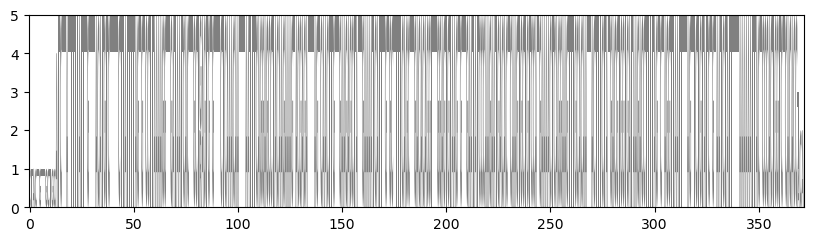

In [63]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn BRCA1 exon5.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

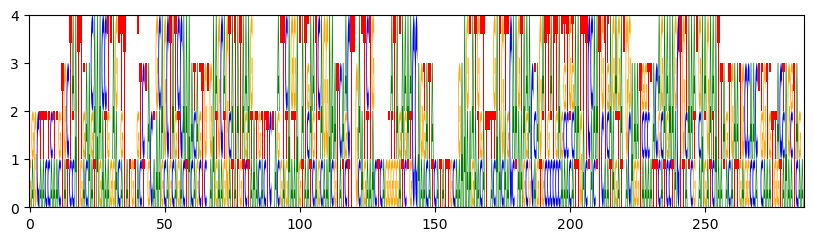

In [66]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn BRCA2 exon11.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

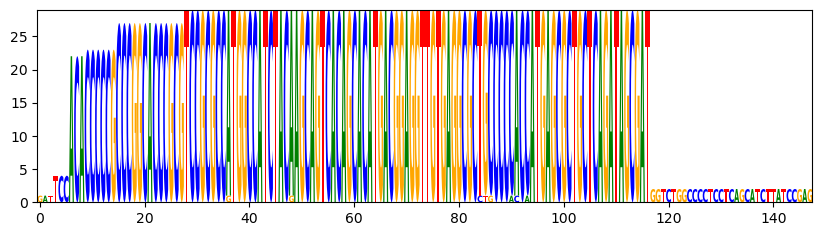

In [67]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn TP53 exon5.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

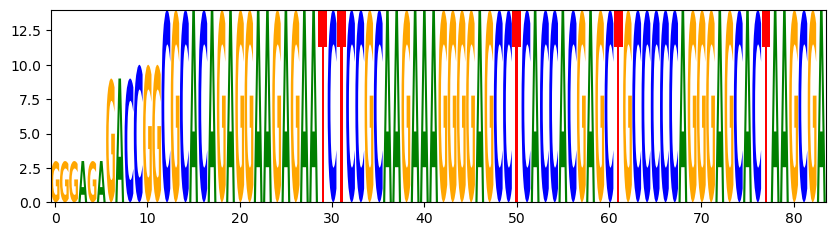

In [68]:
secuencias_alineadas=list(SeqIO.parse("Resultados/Alineamiento secuencias control/Resultados alineamiento clustal/clustal control algn TP53 exon8.afa","fasta"))
secuencias= [str(registro.seq) for registro in secuencias_alineadas]
DF_conteos=logomaker.alignment_to_matrix(secuencias, to_type="counts")
logo = logomaker.Logo(DF_conteos)
plt.show()

### WGCNA